# Лабораторная работа № 2


Лагуткина М. С.

группа М8О-109М-23

### ТЗ:
Глобальная оптимизация и метаэврестические алгоритмы
   - В `pygmo` запрогроммировать две своих тестовых функции и найти их оптимум 3 разными алгоритмами доступными в библиотеке и получить таблицу сравнения

В качастве тестовых функций взяты Функция Матьяса(func_1) и Функция МакКормика(func_2)

In [21]:
!pip install pygmo

In [22]:
import pygmo as pg
import numpy as np

from matplotlib import pyplot as plt
from numpy import linalg
import matplotlib.animation as animation
from IPython.display import HTML
import autograd
import math
import random

In [23]:
class func_1:
    def __init__(self):
        self.dim = 2

    def get_name(self):
        return "Функция Матьяса"

    def fitness(self, p):
        return [0.26 * (p[0] * p[0] + p[1] * p[1]) - 0.48 * p[0] * p[1]]

    def get_bounds(self):
        return ([-10, -10], [10, 10])

    def get_extra_info(self):
        return "\tDimensions: " + str(self.dim)

In [24]:
class func_2:
    def __init__(self):
        self.dim = 2

    def get_name(self):
        return "Функция МакКормика"

    def fitness(self, p):
        return [np.sin(p[0] + p[1]) + (p[0] - p[1]) ** 2 - 1.5 * p[0] + 2.5 * p[1] + 1]

    def get_bounds(self):
        return ([-1.5, -3.], [4., 4.])

    def get_extra_info(self):
        return "\tDimensions: " + str(self.dim)

In [25]:
def draw_f(function) -> None:
    fun = function.fitness
    fig = plt.figure(figsize = (10, 10))
    ax = plt.axes(projection = '3d')

    domain = np.array(list(function.get_bounds()))

    x = np.linspace(domain[0, 0], domain[1, 0], 100)
    y = np.linspace(domain[0, 1], domain[1, 1], 100)

    x_grid, y_grid = np.meshgrid(x, y)
    z_grid = fun(np.array([x_grid, y_grid]))[0]

    ax.plot_surface(x_grid, y_grid, z_grid, cmap = 'plasma', alpha=0.5)

    ax.set_title(function.get_name(), fontsize = 12, fontweight="bold",loc="left")
    ax.legend(loc="upper left")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')


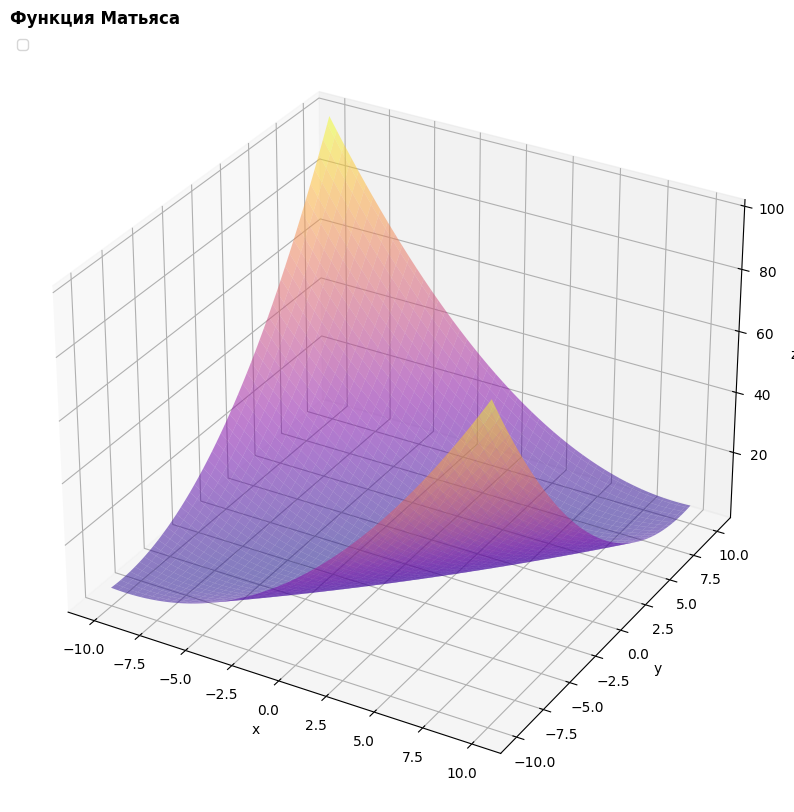

In [26]:
f_1 = func_1()
draw_f(f_1)

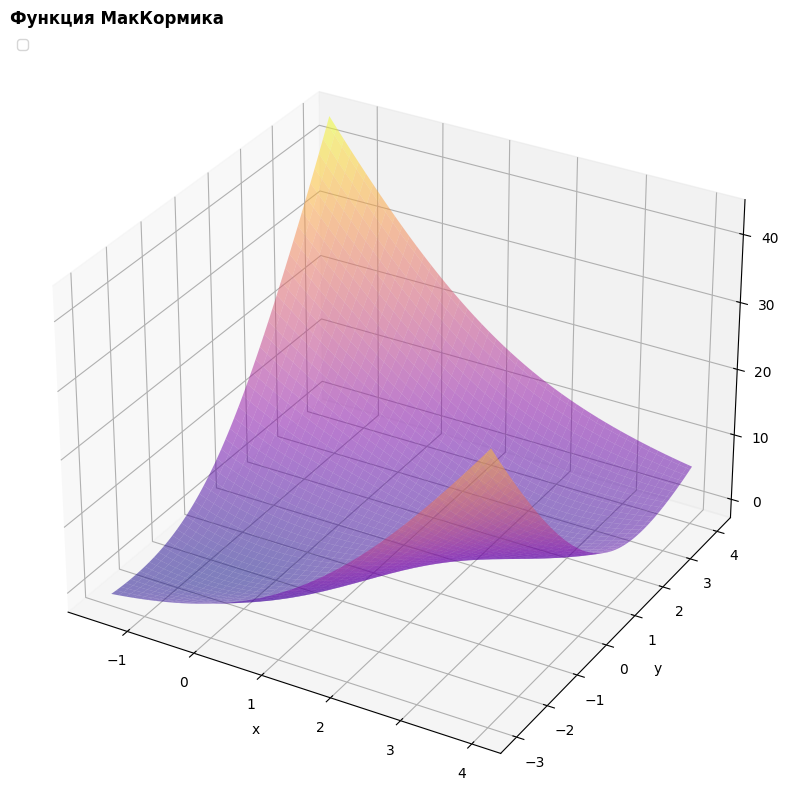

In [27]:
f_2 = func_2()
draw_f(f_2)

In [28]:
algorithms = [pg.sade(gen = 1000, variant = 4), pg.gwo(gen = 1000, seed = 10), pg.sea(gen = 1000, seed = 10)]
for algo in algorithms:
    print(pg.algorithm(algo))

Algorithm name: saDE: Self-adaptive Differential Evolution [stochastic]
	C++ class name: pagmo::sade

	Thread safety: basic

Extra info:
	Generations: 1000
	Variant: 4
	Self adaptation variant: 1
	Stopping xtol: 1e-06
	Stopping ftol: 1e-06
	Memory: false
	Verbosity: 0
	Seed: 3578396863
Algorithm name: GWO: Grey Wolf Optimizer [stochastic]
	C++ class name: pagmo::gwo

	Thread safety: basic

Extra info:
	Generations: 1000
	Verbosity: 0
	Seed: 10
Algorithm name: SEA: (N+1)-EA Simple Evolutionary Algorithm [stochastic]
	C++ class name: pagmo::sea

	Thread safety: basic

Extra info:
	Generations: 1000
	Verbosity: 0
	Seed: 10


In [29]:
def test(function_info: callable, algorithms) -> None:
    colors_ = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))
    colors = colors_(len(algorithms))

    fig = plt.figure(figsize = (10, 10))


    for i in range(len(algorithms)):
        print('='*80)
        # The algorithm
        algo = pg.algorithm(algorithms[i])
        algo.set_verbosity(100)
        print(algo)
        # The problem
        prob = pg.problem(function_info)
        # The initial population
        pop = pg.population(prob, size = 10)
        print(pop)
        # The actual optimization process
        pop = algo.evolve(pop)
        uda = algo.extract(type(algorithms[i]))
        log = uda.get_log()
        plt.semilogy([entry[0] for entry in log],[entry[2]for entry in log], 'k--', label=algo.get_name(), c = colors[i])
        print(pop)
        print('='*80)

    plt.legend(loc="upper left")


Algorithm name: saDE: Self-adaptive Differential Evolution [stochastic]
	C++ class name: pagmo::sade

	Thread safety: basic

Extra info:
	Generations: 1000
	Variant: 4
	Self adaptation variant: 1
	Stopping xtol: 1e-06
	Stopping ftol: 1e-06
	Memory: false
	Verbosity: 100
	Seed: 3578396863
Problem name: Функция Матьяса
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-10, -10]
	Upper bounds: [10, 10]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 10

	Thread safety: none

Extra info:
	Dimensions: 2
Population size: 10

List of individuals: 
#0:
	ID:			10009264633204635258
	Decision vector:	[-2.91128, -1.64197]
	Fitness vector:		[0.610109]
#1:
	ID:			10935006413654731032
	Decisio

<ipython-input-29-697dea3c2c85>:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.semilogy([entry[0] for entry in log],[entry[2]for entry in log], 'k--', label=algo.get_name(), c = colors[i])


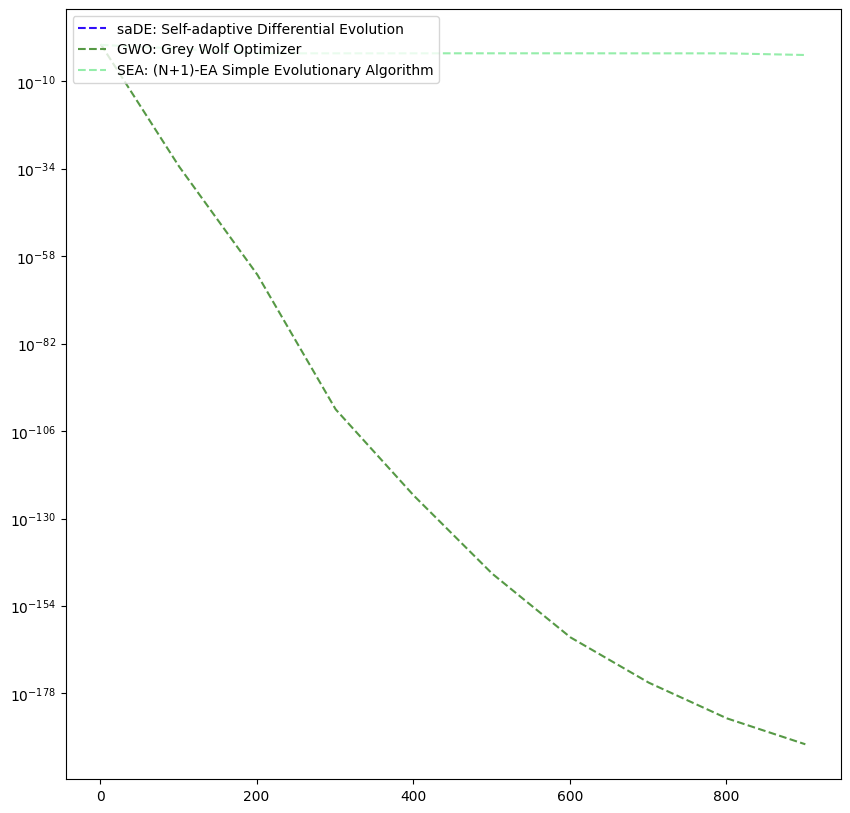

In [30]:
test(f_1, algorithms)

Algorithm name: saDE: Self-adaptive Differential Evolution [stochastic]
	C++ class name: pagmo::sade

	Thread safety: basic

Extra info:
	Generations: 1000
	Variant: 4
	Self adaptation variant: 1
	Stopping xtol: 1e-06
	Stopping ftol: 1e-06
	Memory: false
	Verbosity: 100
	Seed: 3578396863
Problem name: Функция МакКормика
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-1.5, -3]
	Upper bounds: [4, 4]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 10

	Thread safety: none

Extra info:
	Dimensions: 2
Population size: 10

List of individuals: 
#0:
	ID:			15448043106875632730
	Decision vector:	[3.02135, 2.2888]
	Fitness vector:		[1.9]
#1:
	ID:			13295455713265172419
	Decision vecto

<ipython-input-29-697dea3c2c85>:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.semilogy([entry[0] for entry in log],[entry[2]for entry in log], 'k--', label=algo.get_name(), c = colors[i])


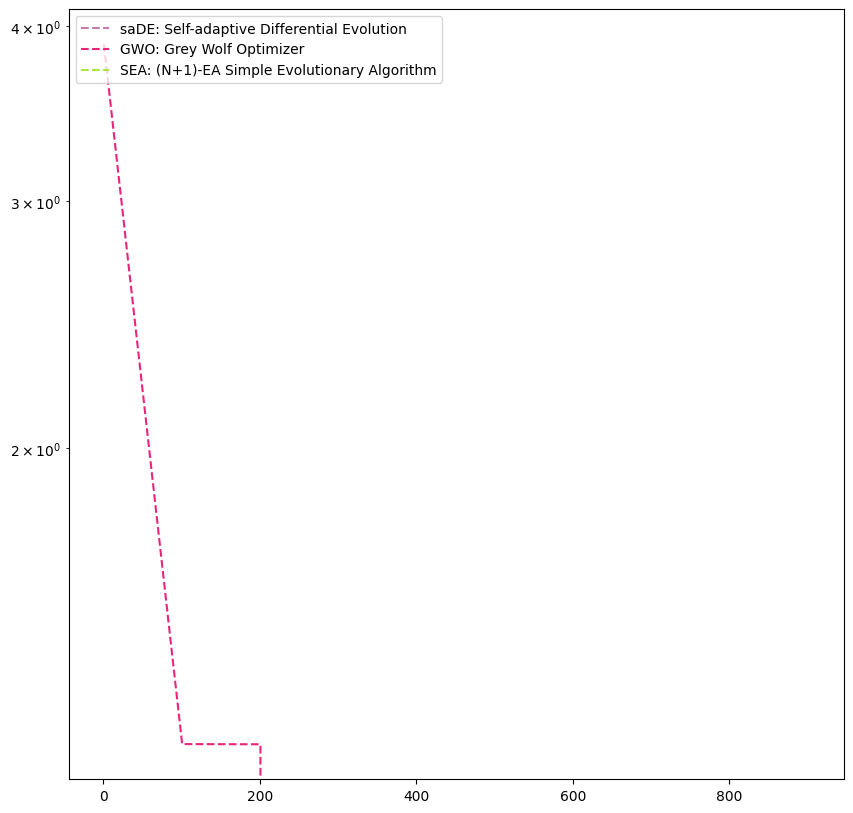

In [31]:
test(f_2, algorithms)